In [58]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [59]:
df = pd.read_csv('combined_targets_data.csv', na_filter=False)
df.head(576)

,Protein,Threshold,EF1%,EF5%,Total EF,Total Actives,Total Database,Delta EF1%,Delta EF5%,Delta Total EF,Linear Log AUC x10,Delta Linear Log AUC x10,ROC AUC,Delta ROC AUC
0,MGLUR1,None,1.9115971747550693,6.509763351868616,1.000000,209,12585,,,,3.5070714180764213,0.0,0.8269758492281712,0.0
1,MGLUR1,1,0.0,6.564102564102564,6.115618,13,128,-1.9115971747550693,0.0543392122339483,5.115617523923445,3.7704276717777354,0.2633562537013132,0.8401337792642141,0.0131579300360428
2,MGLUR1,2,1.4735042735042734,6.476565295169946,4.540598,65,862,-0.4380929012507961,-0.0331980566986693,3.540597697576572,4.017973045549248,0.5109016274728262,0.859714313290223,0.0327384640620517
3,MGLUR1,3,1.7671451355661882,7.180022127390548,3.097719,114,2216,-0.1444520391888812,0.6702587755219325,2.0977190679356745,3.68054929769784,0.1734778796214184,0.8231279316273559,-0.0038479176008153
4,MGLUR1,4,1.3821566561292589,7.114247966066338,2.234164,146,3935,-0.5294405186258107,0.6044846141977223,1.2341640169500798,3.635144598680161,0.1280731806037391,0.8330296424039306,0.0060537931757593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,CRFR1,19,23.216590909090908,11.179957646346995,1.015061,220,12018,0.0366728763040207,-0.0009439929972643,0.0150607422200033,5.382022340692826,0.0155161479068404,0.9155744810368476,0.0005675370667179
572,CRFR1,20,23.13200601051841,11.176264298615292,1.010353,220,12074,-0.0479120222684805,-0.0046373407289692,0.0103528242504555,5.378775553846204,0.012269361060218,0.915312629415464,0.0003056854453344
573,CRFR1,Pareto Baseline,22.91322314049587,11.291970198675498,1.000000,220,220,,,,5.366506192785986,,0.9150069439701296,
574,CRFR1,Pareto Top 10 Rank,0.9973051409618576,9.590555555555556,14.107420,72,72,-21.915917999534013,-1.7014146431199428,13.107420494699646,3.1171366829834275,-2.249369509802558,0.8166140073723012,-0.0983929365978283


In [60]:
# Data Import and Cleaning

df = pd.read_csv('combined_targets_data.csv', na_filter=False)

original_cols = df[['Protein', 'Threshold', 'Total Actives', 'Total Database']]

cols = ['EF1%', 'EF5%', 'Total EF', 'Delta EF1%', 'Delta EF5%', 'Delta Total EF', 'Linear Log AUC x10', 'Delta Linear Log AUC x10', 'ROC AUC', 'Delta ROC AUC']

df[cols] = df[cols].replace(['inf', '-inf'], np.nan) # Replace inf and -inf with NaN

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce') # Convert all columns to numeric, coercing errors to NaN

df[cols] = df[cols].fillna(0) # Fill NaN values with 0

df = pd.concat([original_cols, df[cols]], axis=1)

#print(df)
df.head(576)

,Protein,Threshold,Total Actives,Total Database,EF1%,EF5%,Total EF,Delta EF1%,Delta EF5%,Delta Total EF,Linear Log AUC x10,Delta Linear Log AUC x10,ROC AUC,Delta ROC AUC
0,MGLUR1,None,209,12585,1.911597,6.509763,1.000000,0.000000,0.000000,0.000000,3.507071,0.000000,0.826976,0.000000
1,MGLUR1,1,13,128,0.000000,6.564103,6.115618,-1.911597,0.054339,5.115618,3.770428,0.263356,0.840134,0.013158
2,MGLUR1,2,65,862,1.473504,6.476565,4.540598,-0.438093,-0.033198,3.540598,4.017973,0.510902,0.859714,0.032738
3,MGLUR1,3,114,2216,1.767145,7.180022,3.097719,-0.144452,0.670259,2.097719,3.680549,0.173478,0.823128,-0.003848
4,MGLUR1,4,146,3935,1.382157,7.114248,2.234164,-0.529441,0.604485,1.234164,3.635145,0.128073,0.833030,0.006054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,CRFR1,19,220,12018,23.216591,11.179958,1.015061,0.036673,-0.000944,0.015061,5.382022,0.015516,0.915574,0.000568
572,CRFR1,20,220,12074,23.132006,11.176264,1.010353,-0.047912,-0.004637,0.010353,5.378776,0.012269,0.915313,0.000306
573,CRFR1,Pareto Baseline,220,220,22.913223,11.291970,1.000000,0.000000,0.000000,0.000000,5.366506,0.000000,0.915007,0.000000
574,CRFR1,Pareto Top 10 Rank,72,72,0.997305,9.590556,14.107420,-21.915918,-1.701415,13.107420,3.117137,-2.249370,0.816614,-0.098393


In [61]:
df_1 = df[df['Threshold'] == '1']
df_1.head(24)

,Protein,Threshold,Total Actives,Total Database,EF1%,EF5%,Total EF,Delta EF1%,Delta EF5%,Delta Total EF,Linear Log AUC x10,Delta Linear Log AUC x10,ROC AUC,Delta ROC AUC
1,MGLUR1,1,13,128,0.000000,6.564103,6.115618,-1.911597,0.054339,5.115618,3.770428,0.263356,0.840134,0.013158
25,P2Y12,1,3,89,29.666667,14.833333,1.869805,19.934934,5.701526,0.869805,5.779373,1.515194,0.980620,0.108351
49,5HT2B,1,13,483,0.000000,3.096154,1.771039,-0.463387,2.355778,0.771039,2.405036,0.928106,0.749427,0.213399
73,ACM2,1,2,110,55.000000,11.000000,0.783787,46.668143,7.461798,-0.216213,3.961086,1.642444,0.768519,0.192290
97,ACM3,1,32,686,0.000000,0.000000,1.533817,-0.648971,-0.907366,0.533817,0.766590,-0.402625,0.338064,-0.080190
121,MGLUR5,1,15,702,6.685714,14.708571,0.852709,-0.956009,10.556911,-0.147291,4.989196,1.720858,0.949636,0.154013
145,GPR40,1,4,164,41.000000,10.250000,0.878549,32.813525,1.634620,-0.121451,5.201077,0.897242,0.910937,0.034568
169,OPRX,1,14,281,0.000000,0.000000,2.901206,-2.239667,-1.045178,1.901206,0.537172,-0.554995,0.293740,-0.075937
193,S1PR1,1,0,50,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
217,OPRM,1,3,189,0.000000,0.000000,0.447338,-0.521894,-0.207987,-0.552662,0.552623,-0.020325,0.270609,0.020987


In [62]:
print(len(df))

576


In [63]:
# Mean and Standard Deviation

grouped_df = df.groupby('Threshold').agg({
    'Delta EF1%': ['mean', 'std'],
    'Delta EF5%': ['mean', 'std'],
    'Delta Total EF': ['mean', 'std'],
    'Delta Linear Log AUC x10': ['mean', 'std'],
    'Delta ROC AUC': ['mean', 'std']
}).reset_index()

grouped_df.columns = [
    ' '.join(['Mean' if func == 'mean' else 'Std' if func == 'std' else '', col]).strip()
    for col, func in grouped_df.columns
]


In [64]:
grouped_df.head()

,Threshold,Mean Delta EF1%,Std Delta EF1%,Mean Delta EF5%,Std Delta EF5%,Mean Delta Total EF,Std Delta Total EF,Mean Delta Linear Log AUC x10,Std Delta Linear Log AUC x10,Mean Delta ROC AUC,Std Delta ROC AUC
0,1,8.259509,19.656405,1.918718,4.620895,0.147373,1.418387,0.395489,1.435590,-0.001200,0.187642
1,10,0.589424,2.000018,0.218398,0.585095,-0.016759,0.163322,0.038272,0.188113,-0.005713,0.027772
2,11,0.525456,1.764665,0.162822,0.461590,-0.018198,0.131962,0.025585,0.153233,-0.005789,0.022412
3,12,0.531750,1.485673,0.144771,0.352974,-0.014420,0.103148,0.028637,0.107326,-0.003012,0.014419
4,13,0.457002,1.431791,0.142304,0.294184,-0.014567,0.088926,0.019942,0.085475,-0.003400,0.014301


AttributeError: Rectangle.set() got an unexpected keyword argument 'err_kws'

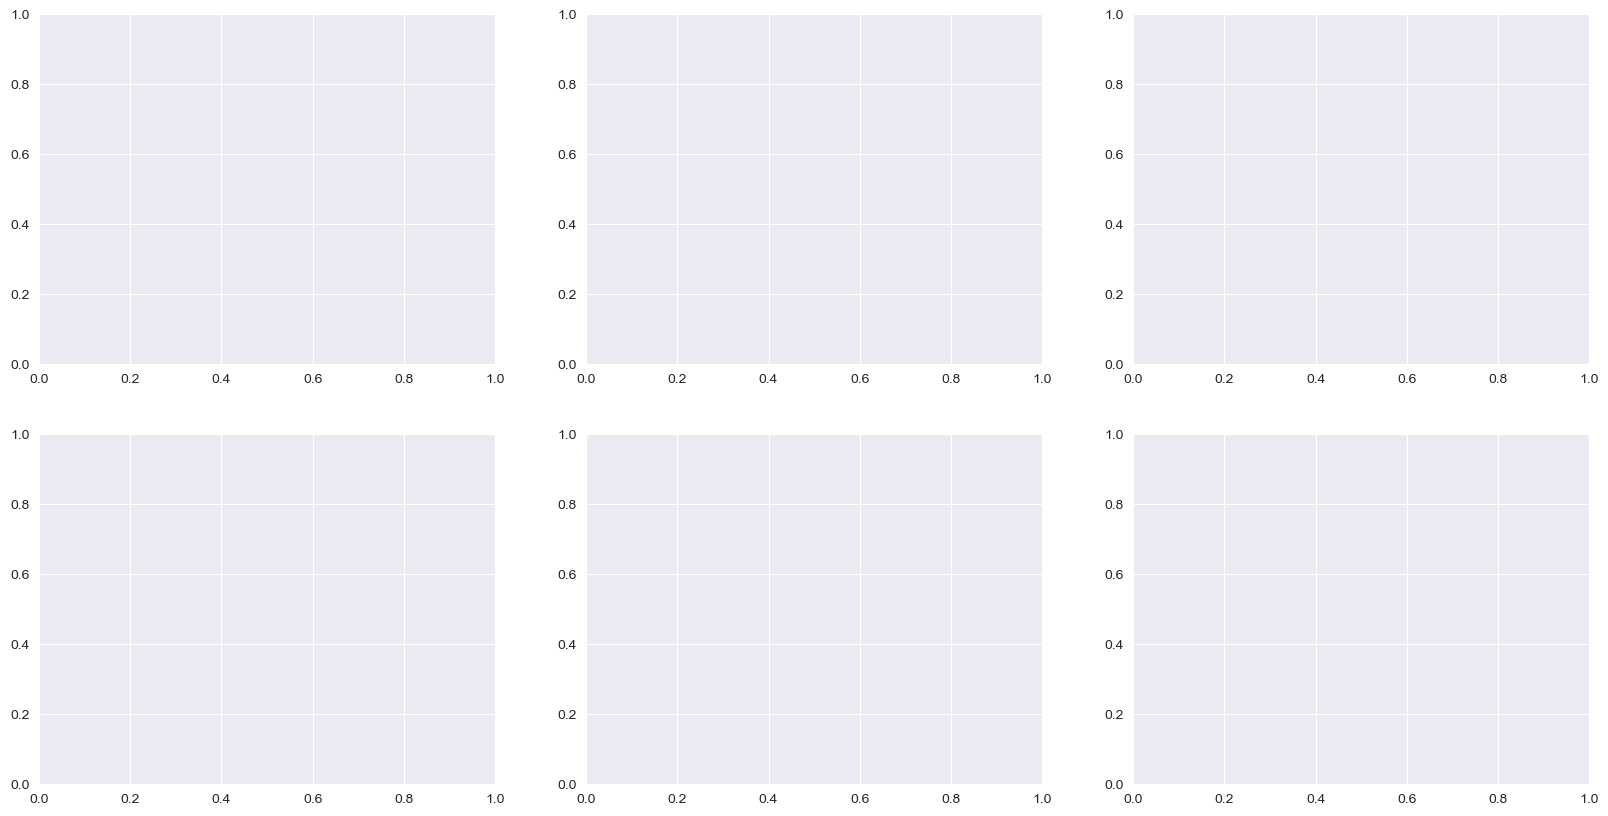

In [65]:
# Plots

plt_columns_mean = ['Mean Delta EF1%', 'Mean Delta EF5%', 'Mean Delta Total EF', 'Mean Delta Linear Log AUC x10', 'Mean Delta ROC AUC']
plt_columns_std = ['Std Delta EF1%', 'Std Delta EF5%', 'Std Delta Total EF', 'Std Delta Linear Log AUC x10', 'Std Delta ROC AUC']

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

axes = axes.flatten()

custom_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Pareto Baseline', 'Pareto Top 10 Rank', 'Pareto Top 20 Rank']

for i, (column, column_std) in enumerate(zip(plt_columns_mean, plt_columns_std)):
    sns.barplot(
        x='Threshold',
        y=column,
        data=grouped_df,
        ax=axes[i],
        order=custom_order,
        err_kws={'linewidth': 1}
    )

    #errors = grouped_df[column_std].values
    #axes[i].errorbar(
        #x=grouped_df['Threshold'], y=grouped_df[column], yerr=errors,
       #fmt='none', c='black', capsize=4
    #)

    axes[i].set_xlabel("Threshold")
    axes[i].set_ylabel(f"Mean {column.split('_')[0]}")
    axes[i].tick_params(axis='x', rotation=90)

axes[len(plt_columns_mean)].axis('off')

plt.tight_layout()
plt.show()


ValueError: Could not interpret input 'Delta EF1%_mean'

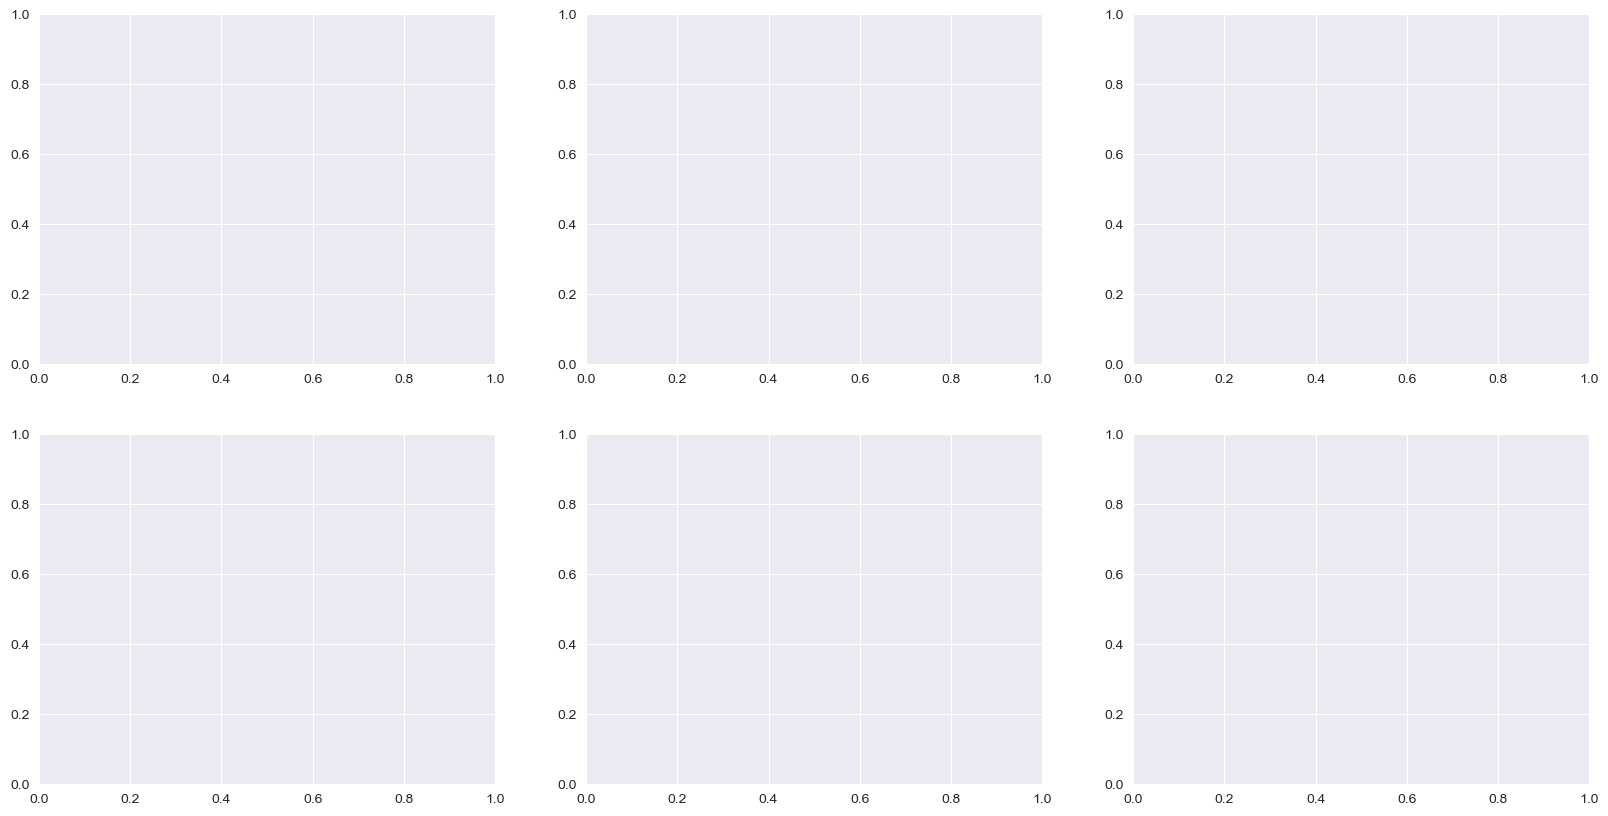

In [66]:
# Plots

plt_columns_mean = ['Delta EF1%_mean', 'Delta EF5%_mean', 'Delta Total EF_mean', 'Delta Linear Log AUC x10_mean', 'Delta ROC AUC_mean']
plt_columns_std = ['Delta EF1%_std', 'Delta EF5%_std', 'Delta Total EF_std', 'Delta Linear Log AUC x10_std', 'Delta ROC AUC_std']

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

axes = axes.flatten()

custom_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Pareto Baseline', 'Pareto Top 10 Rank', 'Pareto Top 20 Rank']

for i, (column, column_std) in enumerate(zip(plt_columns_mean, plt_columns_std)):
    sns.barplot(
        x='Threshold',
        y=column,
        data=grouped_df,
        ax=axes[i],
        order=custom_order,
        err_kws={'linewidth': 1}
    )

    errors = grouped_df[column_std].values
    axes[i].errorbar(
        grouped_df['Threshold'], grouped_df[column], yerr=errors,
        fmt='none', c='black', capsize=4
    )

    axes[i].set_xlabel("Threshold")
    axes[i].set_ylabel(f"Mean {column.split('_')[0]}")
    axes[i].tick_params(axis='x', rotation=90)

axes[len(plt_columns_mean)].axis('off')

plt.tight_layout()
plt.show()


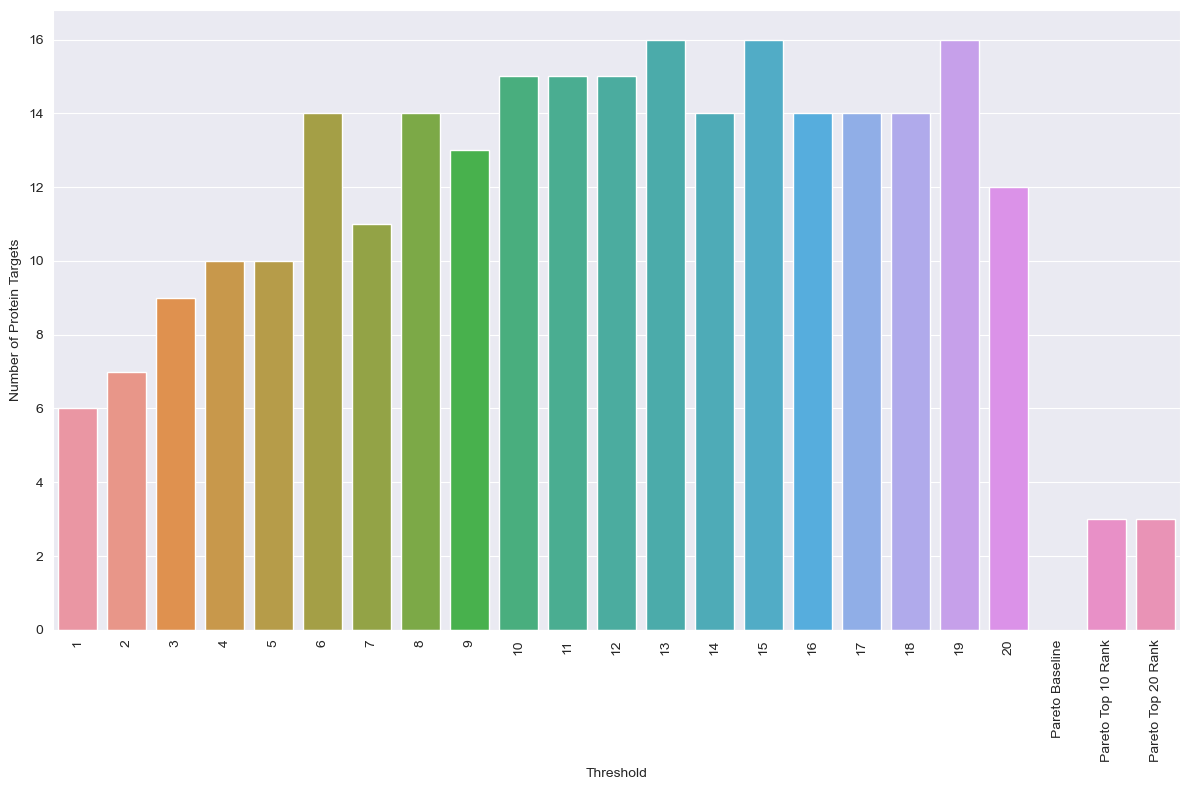

In [67]:
# Plot: Protein Targets with Positive Delta EF1%"

positive_delta = df[df['Delta EF1%'] > 0].groupby('Threshold')['Protein'].count().reset_index()
positive_delta.columns = ['Threshold', 'Positive Count']

custom_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Pareto Baseline', 'Pareto Top 10 Rank', 'Pareto Top 20 Rank']

plt.figure(figsize=(12, 8))
sns.barplot(x='Threshold', y='Positive Count', data=positive_delta, order=custom_order)

plt.title("")
plt.xlabel("Threshold")
plt.ylabel("Number of Protein Targets")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

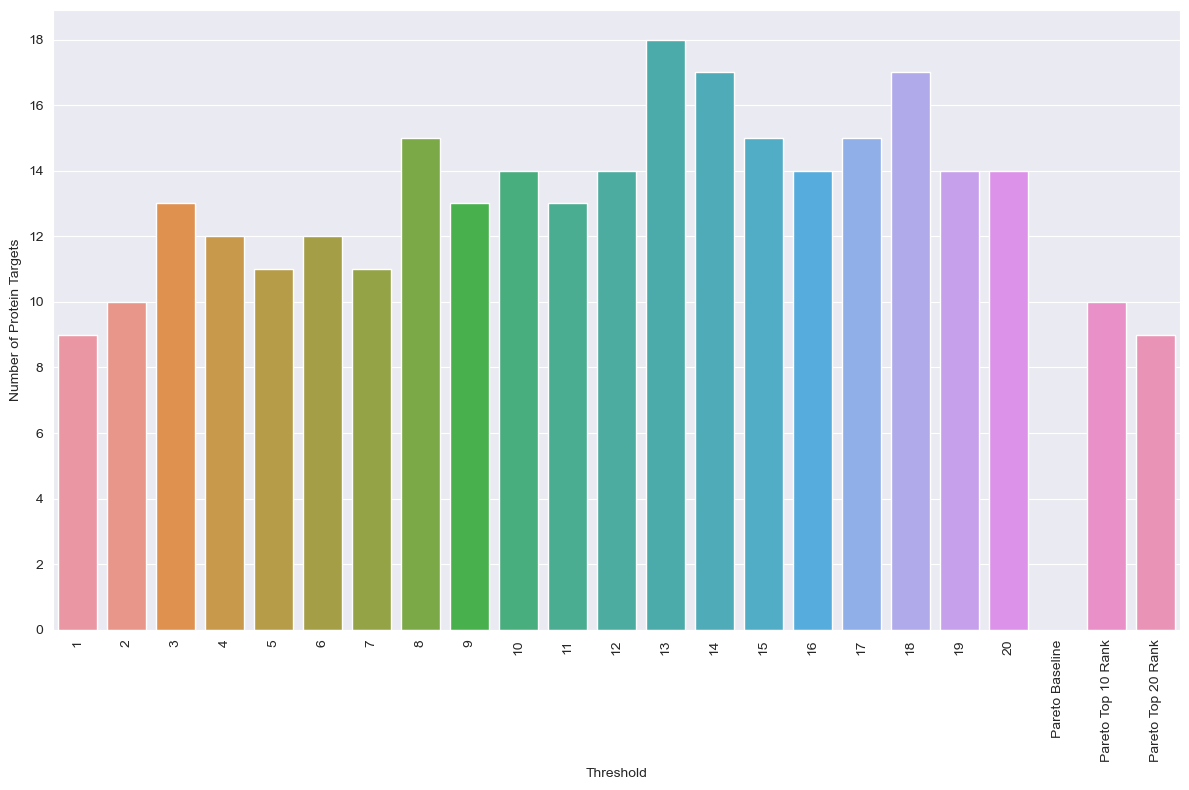

In [68]:
# Plot: Protein Targets with Positive Delta EF5%"

positive_delta = df[df['Delta EF5%'] > 0].groupby('Threshold')['Protein'].count().reset_index()
positive_delta.columns = ['Threshold', 'Positive Count']

custom_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Pareto Baseline', 'Pareto Top 10 Rank', 'Pareto Top 20 Rank']

plt.figure(figsize=(12, 8))
sns.barplot(x='Threshold', y='Positive Count', data=positive_delta, order=custom_order)

max_count = positive_delta['Positive Count'].max()
plt.yticks(np.arange(0, max_count + 2, 2))

plt.title("")
plt.xlabel("Threshold")
plt.ylabel("Number of Protein Targets")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

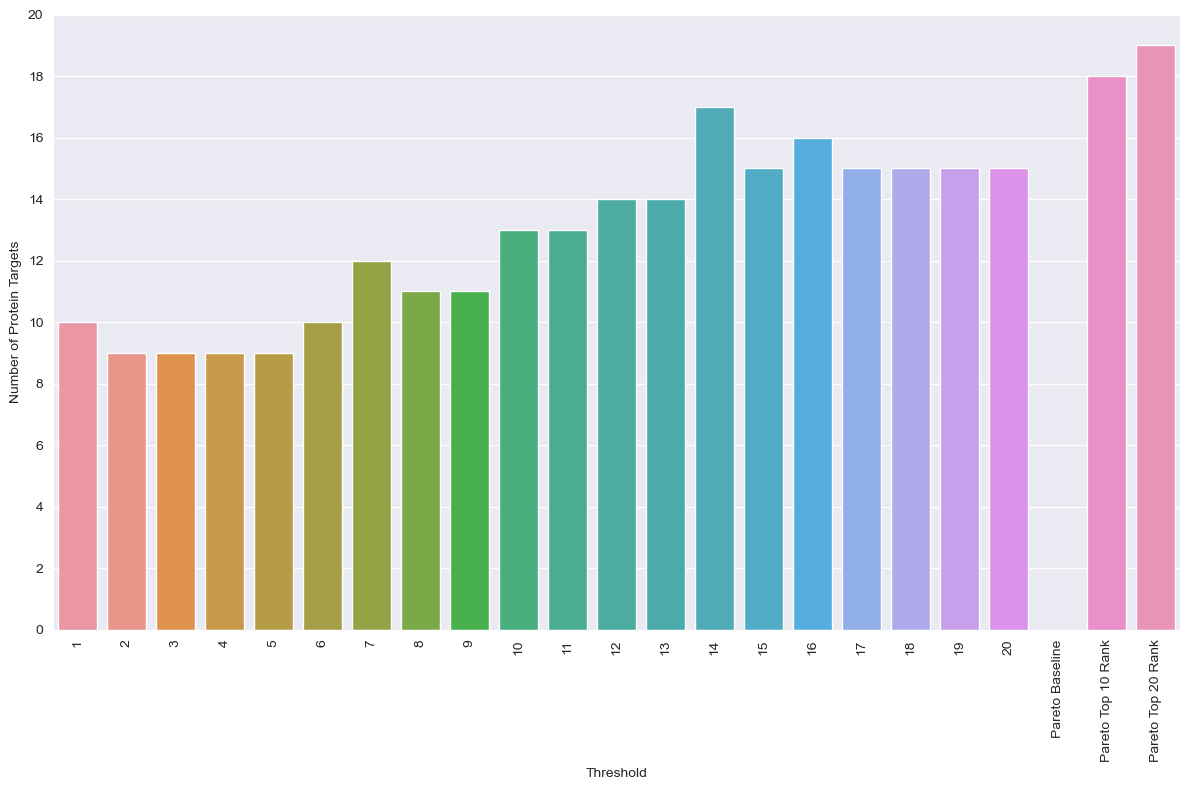

In [69]:
# Plot: Protein Targets with Positive Delta Total EF"

positive_delta = df[df['Delta Total EF'] > 0].groupby('Threshold')['Protein'].count().reset_index()
positive_delta.columns = ['Threshold', 'Positive Count']

custom_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Pareto Baseline', 'Pareto Top 10 Rank', 'Pareto Top 20 Rank']

plt.figure(figsize=(12, 8))
sns.barplot(x='Threshold', y='Positive Count', data=positive_delta, order=custom_order)

max_count = positive_delta['Positive Count'].max()
plt.yticks(np.arange(0, max_count + 2, 2))

plt.title("")
plt.xlabel("Threshold")
plt.ylabel("Number of Protein Targets")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

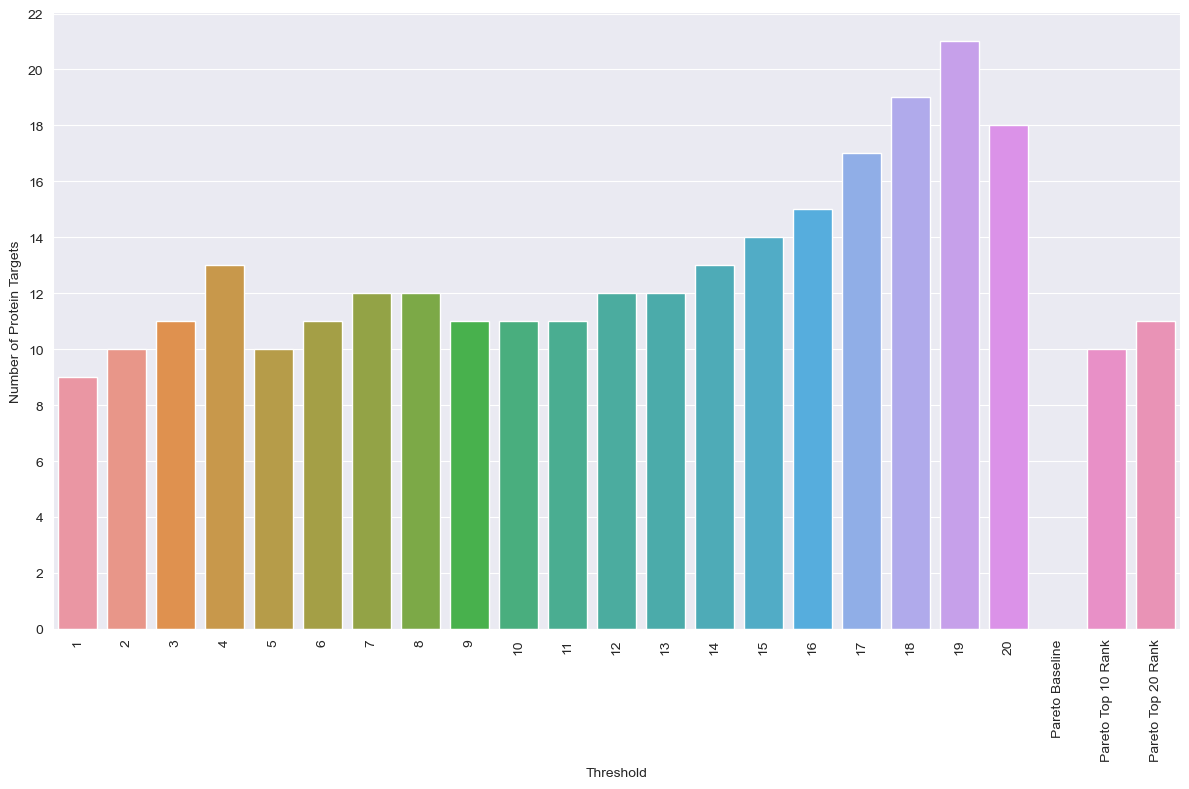

In [70]:
# Plot: Protein Targets with Positive Delta Linear Log AUC x10"

positive_delta = df[df['Delta Linear Log AUC x10'] > 0].groupby('Threshold')['Protein'].count().reset_index()
positive_delta.columns = ['Threshold', 'Positive Count']

custom_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Pareto Baseline', 'Pareto Top 10 Rank', 'Pareto Top 20 Rank']

plt.figure(figsize=(12, 8))
sns.barplot(x='Threshold', y='Positive Count', data=positive_delta, order=custom_order)

max_count = positive_delta['Positive Count'].max()
plt.yticks(np.arange(0, max_count + 2, 2))

plt.title("")
plt.xlabel("Threshold")
plt.ylabel("Number of Protein Targets")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

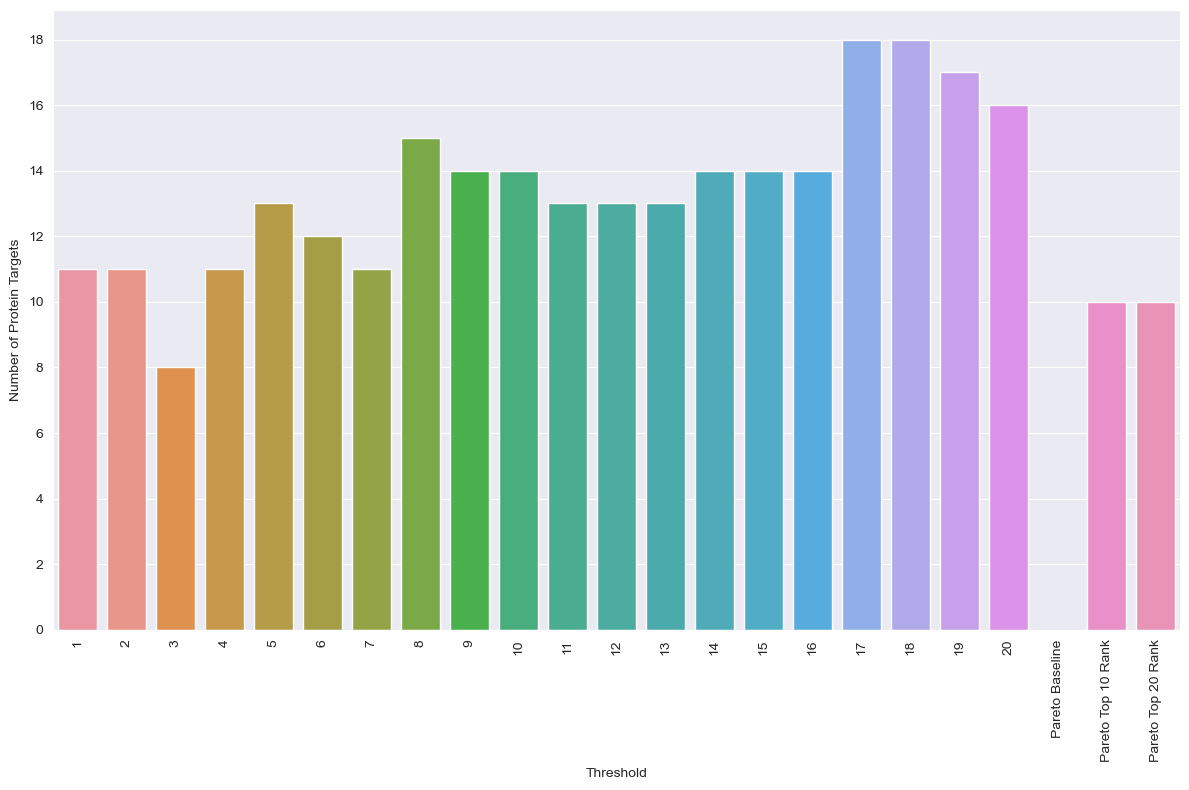

In [71]:
# Plot: Protein Targets with Positive Delta ROC AUC"

positive_delta = df[df['Delta ROC AUC'] > 0].groupby('Threshold')['Protein'].count().reset_index()
positive_delta.columns = ['Threshold', 'Positive Count']

custom_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Pareto Baseline', 'Pareto Top 10 Rank', 'Pareto Top 20 Rank']

plt.figure(figsize=(12, 8))
sns.barplot(x='Threshold', y='Positive Count', data=positive_delta, order=custom_order)

max_count = positive_delta['Positive Count'].max()
plt.yticks(np.arange(0, max_count + 2, 2))

plt.title("")
plt.xlabel("Threshold")
plt.ylabel("Number of Protein Targets")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

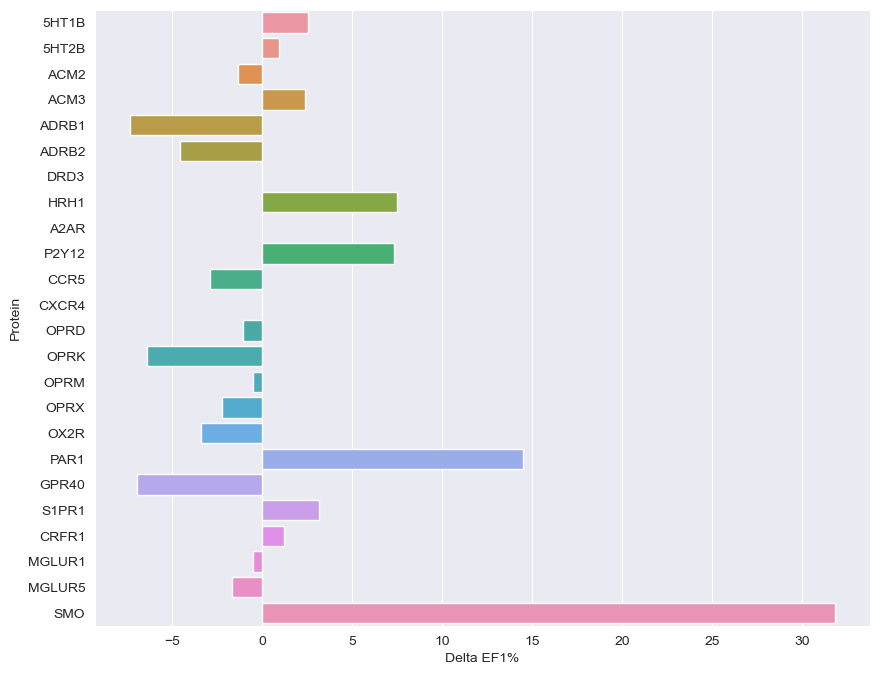

In [72]:
# Plot: Strain Energy Threshold - Delta EF1%

threshold_df = df[df['Threshold'] == "4"]

custom_order = ['5HT1B', '5HT2B', 'ACM2', 'ACM3', 'ADRB1', 'ADRB2', 'DRD3', 'HRH1', 'A2AR', 'P2Y12', 'CCR5', 'CXCR4', 'OPRD', 'OPRK', 'OPRM', 'OPRX', 'OX2R', 'PAR1', 'GPR40', 'S1PR1', 'CRFR1', 'MGLUR1', 'MGLUR5', 'SMO']
plt.figure(figsize=(10, 8))
sns.barplot(x='Delta EF1%', y='Protein', data=threshold_df, order=custom_order)

plt.title("")
plt.xlabel("Delta EF1%")
plt.ylabel("Protein")

plt.show()


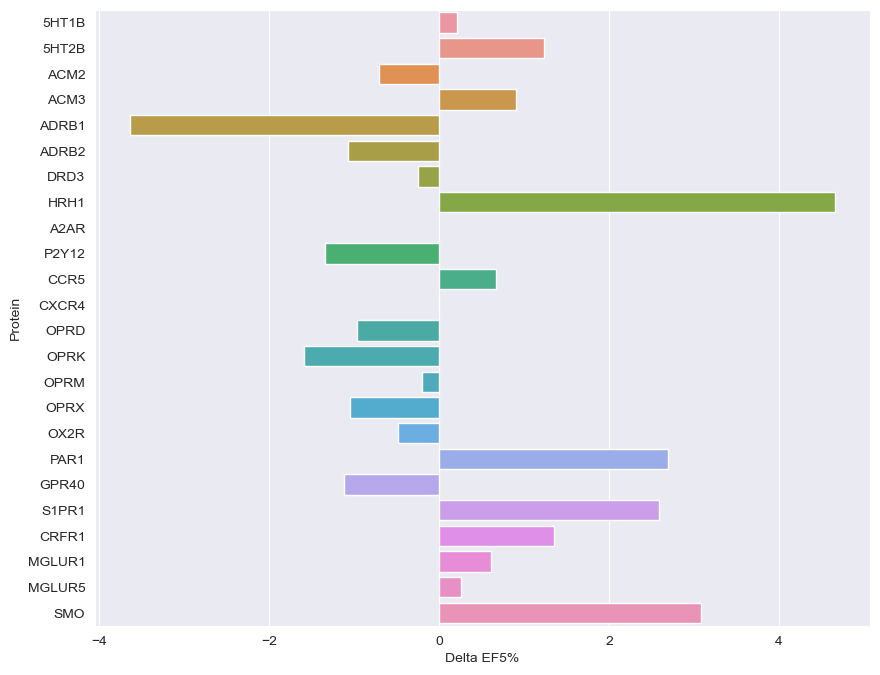

In [73]:
# Plot: Strain Energy Threshold - Delta EF5%

threshold_df = df[df['Threshold'] == "4"]

custom_order = ['5HT1B', '5HT2B', 'ACM2', 'ACM3', 'ADRB1', 'ADRB2', 'DRD3', 'HRH1', 'A2AR', 'P2Y12', 'CCR5', 'CXCR4', 'OPRD', 'OPRK', 'OPRM', 'OPRX', 'OX2R', 'PAR1', 'GPR40', 'S1PR1', 'CRFR1', 'MGLUR1', 'MGLUR5', 'SMO']
plt.figure(figsize=(10, 8))
sns.barplot(x='Delta EF5%', y='Protein', data=threshold_df, order=custom_order)

plt.title("")
plt.xlabel("Delta EF5%")
plt.ylabel("Protein")

plt.show()

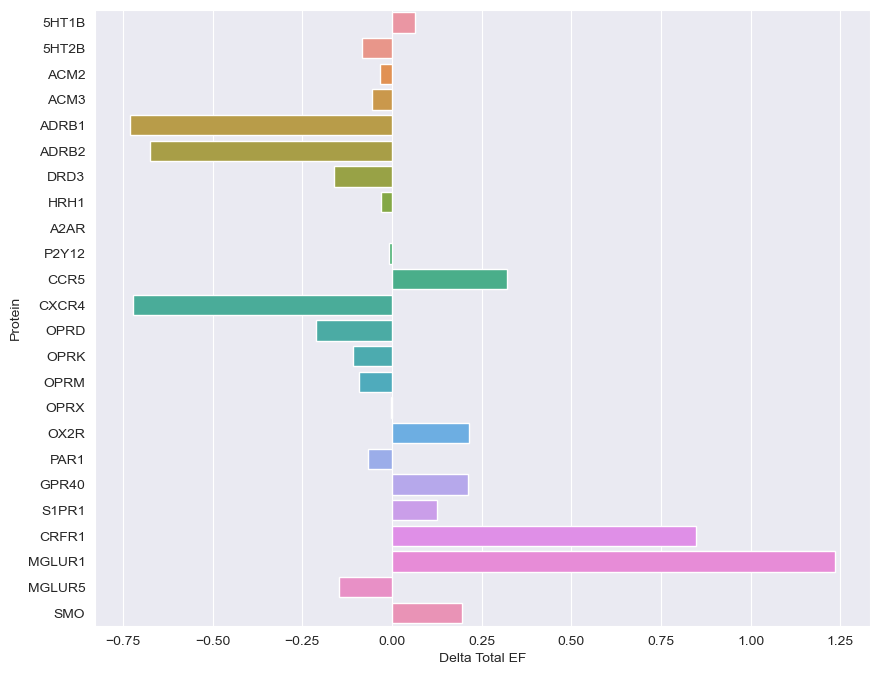

In [74]:
# Plot: Strain Energy Threshold - Delta Total EF%

threshold_df = df[df['Threshold'] == "4"]

custom_order = ['5HT1B', '5HT2B', 'ACM2', 'ACM3', 'ADRB1', 'ADRB2', 'DRD3', 'HRH1', 'A2AR', 'P2Y12', 'CCR5', 'CXCR4', 'OPRD', 'OPRK', 'OPRM', 'OPRX', 'OX2R', 'PAR1', 'GPR40', 'S1PR1', 'CRFR1', 'MGLUR1', 'MGLUR5', 'SMO']
plt.figure(figsize=(10, 8))
sns.barplot(x='Delta Total EF', y='Protein', data=threshold_df, order=custom_order)

plt.title("")
plt.xlabel("Delta Total EF")
plt.ylabel("Protein")

plt.show()

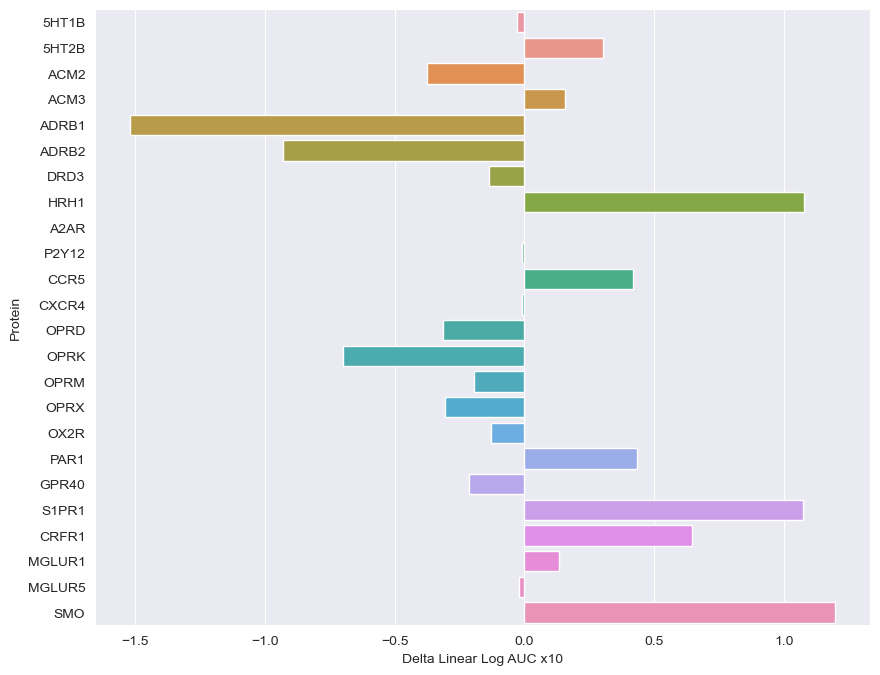

In [75]:
# Plot: Strain Energy Threshold - Delta Linear Log AUC x10

threshold_df = df[df['Threshold'] == "5"]

custom_order = ['5HT1B', '5HT2B', 'ACM2', 'ACM3', 'ADRB1', 'ADRB2', 'DRD3', 'HRH1', 'A2AR', 'P2Y12', 'CCR5', 'CXCR4', 'OPRD', 'OPRK', 'OPRM', 'OPRX', 'OX2R', 'PAR1', 'GPR40', 'S1PR1', 'CRFR1', 'MGLUR1', 'MGLUR5', 'SMO']
plt.figure(figsize=(10, 8))
sns.barplot(x='Delta Linear Log AUC x10', y='Protein', data=threshold_df, order=custom_order)

plt.title("")
plt.xlabel("Delta Linear Log AUC x10")
plt.ylabel("Protein")

plt.show()

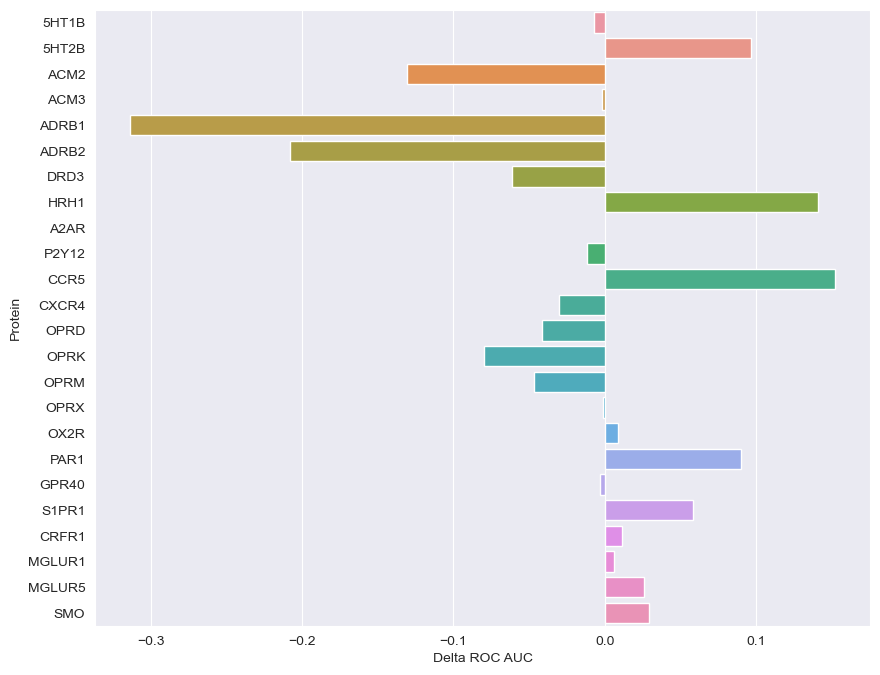

In [76]:
# Plot: Strain Energy Threshold - Delta ROC AUC

threshold_df = df[df['Threshold'] == "4"]

custom_order = ['5HT1B', '5HT2B', 'ACM2', 'ACM3', 'ADRB1', 'ADRB2', 'DRD3', 'HRH1', 'A2AR', 'P2Y12', 'CCR5', 'CXCR4', 'OPRD', 'OPRK', 'OPRM', 'OPRX', 'OX2R', 'PAR1', 'GPR40', 'S1PR1', 'CRFR1', 'MGLUR1', 'MGLUR5', 'SMO']
plt.figure(figsize=(10, 8))
sns.barplot(x='Delta ROC AUC', y='Protein', data=threshold_df, order=custom_order)

plt.title("")
plt.xlabel("Delta ROC AUC")
plt.ylabel("Protein")

plt.show()

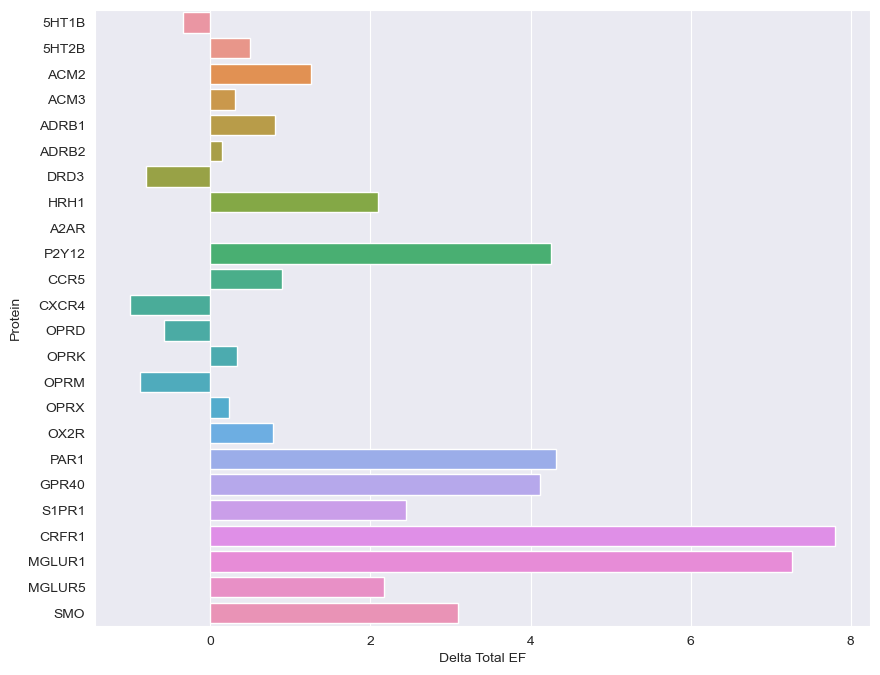

In [77]:
# Plot: Pareto Threshold - Delta Total EF%

threshold_df = df[df['Threshold'] == "Pareto Top 20 Rank"]

custom_order = ['5HT1B', '5HT2B', 'ACM2', 'ACM3', 'ADRB1', 'ADRB2', 'DRD3', 'HRH1', 'A2AR', 'P2Y12', 'CCR5', 'CXCR4', 'OPRD', 'OPRK', 'OPRM', 'OPRX', 'OX2R', 'PAR1', 'GPR40', 'S1PR1', 'CRFR1', 'MGLUR1', 'MGLUR5', 'SMO']
plt.figure(figsize=(10, 8))
sns.barplot(x='Delta Total EF', y='Protein', data=threshold_df, order=custom_order)

plt.title("")
plt.xlabel("Delta Total EF")
plt.ylabel("Protein")

plt.show()

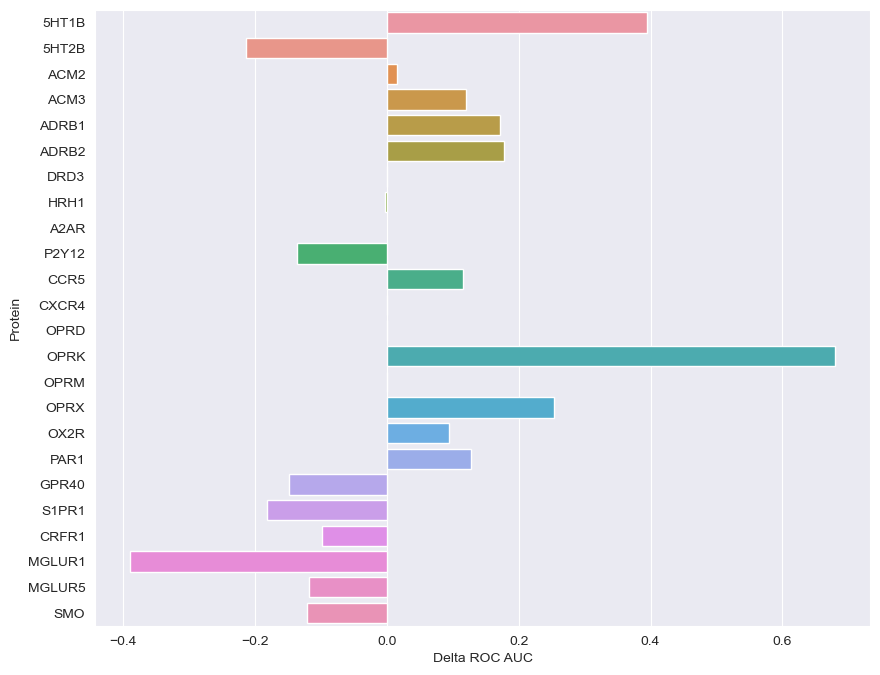

In [78]:
# Plot: Pareto Threshold - Delta ROC AUC

threshold_df = df[df['Threshold'] == "Pareto Top 10 Rank"]

custom_order = ['5HT1B', '5HT2B', 'ACM2', 'ACM3', 'ADRB1', 'ADRB2', 'DRD3', 'HRH1', 'A2AR', 'P2Y12', 'CCR5', 'CXCR4', 'OPRD', 'OPRK', 'OPRM', 'OPRX', 'OX2R', 'PAR1', 'GPR40', 'S1PR1', 'CRFR1', 'MGLUR1', 'MGLUR5', 'SMO']
plt.figure(figsize=(10, 8))
sns.barplot(x='Delta ROC AUC', y='Protein', data=threshold_df, order=custom_order)

plt.title("")
plt.xlabel("Delta ROC AUC")
plt.ylabel("Protein")

plt.show()

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_9180/3375086792.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protein_df['Reduction (%)'] = ((total_db_size - protein_df['Total Database']) / total_db_size) * 100


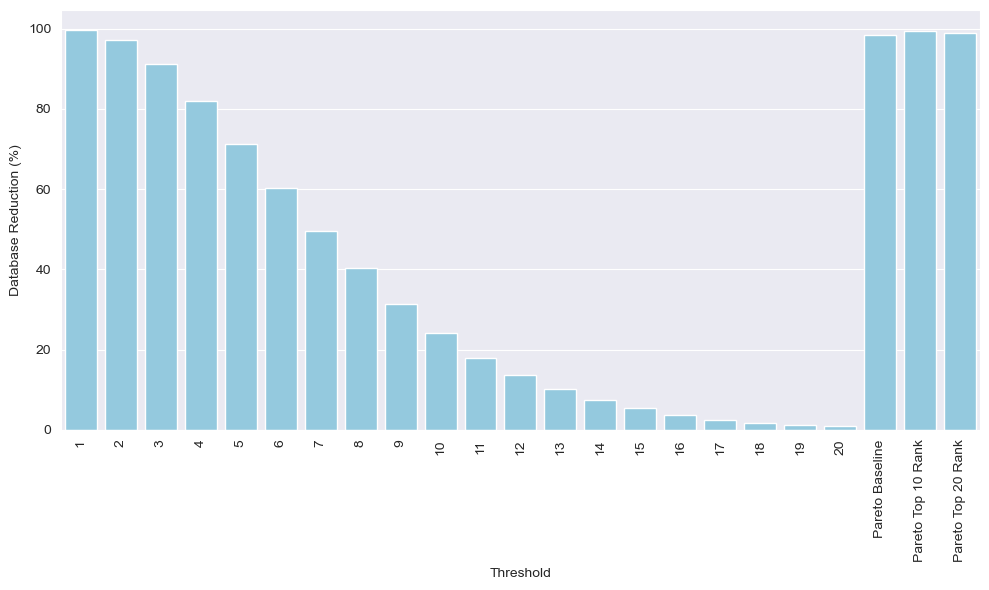

In [79]:
# Plot: Database Reduction (%)

protein_df = df[df['Protein'] == "SMO"]

custom_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Pareto Baseline', 'Pareto Top 10 Rank', 'Pareto Top 20 Rank']

total_db_size = protein_df[protein_df['Threshold'] == 'None']['Total Database'].values[0]

protein_df['Reduction (%)'] = ((total_db_size - protein_df['Total Database']) / total_db_size) * 100

plt.figure(figsize=(10, 6))

sns.barplot(x='Threshold', y='Reduction (%)', data=protein_df, color='skyblue', order=custom_order)
plt.xlabel("Threshold")
plt.ylabel("Database Reduction (%)")

plt.title("")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

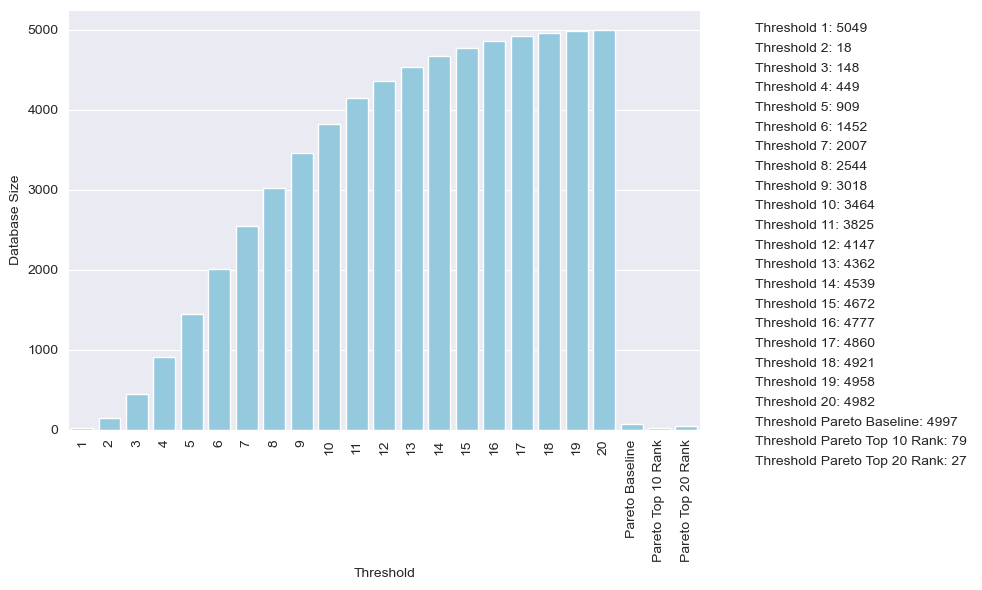

In [80]:
# Plot: Database Reduction

protein_df = df[df['Protein'] == "SMO"]

custom_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Pareto Baseline', 'Pareto Top 10 Rank', 'Pareto Top 20 Rank']

threshold_database_size = {}
for threshold in custom_order:
    threshold_database_size[threshold] = protein_df.loc[protein_df['Threshold'] == threshold, 'Total Database'].iloc[0]

plt.figure(figsize=(10, 6))

sns.barplot(x='Threshold', y='Total Database', data=protein_df, color='skyblue', order=custom_order)
plt.xlabel("Threshold")
plt.ylabel("Database Size")
plt.title("")
plt.xticks(rotation=90)

threshold_database_size = {threshold: size for threshold, size in zip(custom_order, protein_df['Total Database'])}
legend_labels = [f'Threshold {threshold}: {size}' for threshold, size in threshold_database_size.items()]
plt.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', handlelength=0, frameon=False)

plt.tight_layout()
plt.show()

